# Glossary Tokenisation Analysis

Why does a WCE method which uses a smaller glossary do better than a WCE method which uses a larger glossary? We'll explore possible reasons here.

In [4]:
#I've obtained the frequency of each up-weighted token in the training set
def read_dict_from_file(filename):
    read_dict = {}
    f = open(filename, "r", encoding = "utf8")
    for line in f.readlines():
        line = line.strip()
        content = line.split("\t")
        read_dict[int(content[0])] = float(content[1])
    f.close()
    return read_dict

In [7]:
gloss_010_base = read_dict_from_file("gloss_010_base.txt")
gloss_010_big = read_dict_from_file("gloss_010_big.txt")
gloss_025_base = read_dict_from_file("gloss_025_base.txt")
gloss_entire_big = read_dict_from_file("gloss_entire_big.txt")

In [13]:
#Shows that Ailem's upweighted tokens are a subset of WCE's weighted tokens for Opus-base
tokens_in_010_only_base = {}
for key in gloss_010_base.keys():
    if key not in gloss_025_base.keys():
        tokens_in_010_only_base[key] = gloss_010_base[key]
len(tokens_in_010_only_base)

0

In [14]:
tokens_in_025_only_base = {}
for key in gloss_025_base.keys():
    if key not in gloss_010_base.keys():
        tokens_in_025_only_base[key] = gloss_025_base[key]
len(tokens_in_025_only_base)

206

In [15]:
#Let's see if there are any patterns in frequency distribution; sort our dictionaries first.
tokens_in_025_only_base = {k: v for k, v in sorted(tokens_in_025_only_base.items(), key=lambda item: item[1])}
gloss_010_base = {k: v for k, v in sorted(gloss_010_base.items(), key=lambda item: item[1])}
gloss_025_base  = {k: v for k, v in sorted(gloss_025_base.items(), key=lambda item: item[1])}

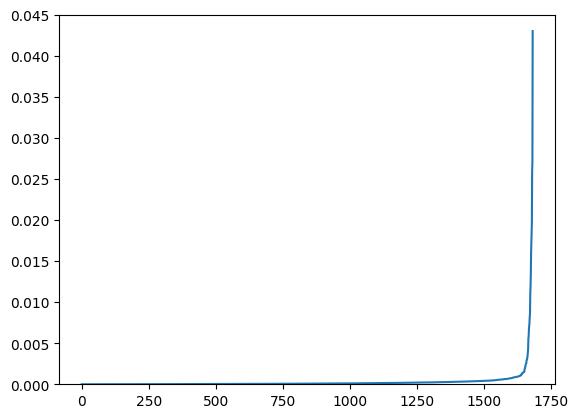

In [39]:
import matplotlib.pyplot as plt
plt.plot(range(len(gloss_010_base)), list(gloss_010_base.values()))
#plt.line(range(len(gloss_010_base)), list(gloss_010_base.values()), align='center')
plt.ylim(0, 0.045)
plt.show()

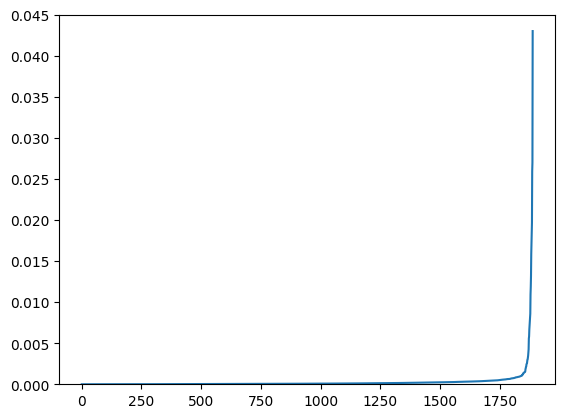

In [40]:
plt.plot(range(len(gloss_025_base)), list(gloss_025_base.values()))
#plt.bar(range(len(gloss_025_base)), list(gloss_025_base.values()), align='center')
plt.ylim(0, 0.045)
plt.show()

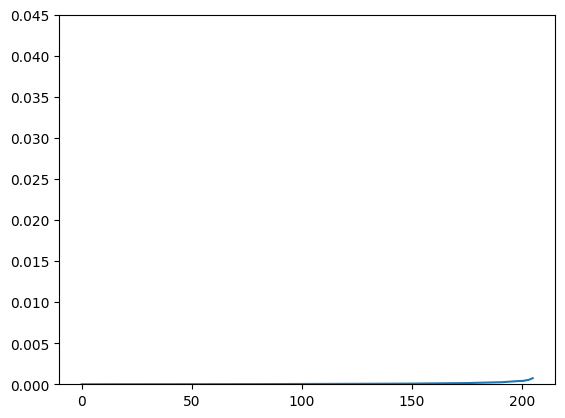

In [41]:
plt.plot(range(len(tokens_in_025_only_base)), list(tokens_in_025_only_base.values()))
#plt.bar(range(len(tokens_in_025_only_base)), list(tokens_in_025_only_base.values()), align='center')
plt.ylim(0, 0.045)
plt.show()

In [ ]:
#Now, this is interesting, because the additional tokens aren't particularly frequent. However, what's missing is their context - which words these tokens were a part of in the training set. 
#That list is still being generated, unfortunately.

In [25]:
#Again, shows that Ailem's upweighted tokens are a subset of WCE's weighted tokens for Opus-big (duh, we got the entire glossary)
tokens_in_010_only_big = {}
for key in gloss_010_big.keys():
    if key not in gloss_entire_big.keys():
        tokens_in_010_only_big[key] = gloss_010_big[key]
len(tokens_in_010_only_big)

0

In [26]:
tokens_in_entire_only_big = {}
for key in gloss_entire_big.keys():
    if key not in gloss_010_big.keys():
        tokens_in_entire_only_big[key] = gloss_entire_big[key]
len(tokens_in_entire_only_big)

3660

In [33]:
tokens_in_entire_only_big = {k: v for k, v in sorted(tokens_in_entire_only_big.items(), key=lambda item: item[1])}
gloss_entire_big = {k: v for k, v in sorted(gloss_entire_big.items(), key=lambda item: item[1])}
gloss_010_big = {k: v for k, v in sorted(gloss_010_big.items(), key=lambda item: item[1])}

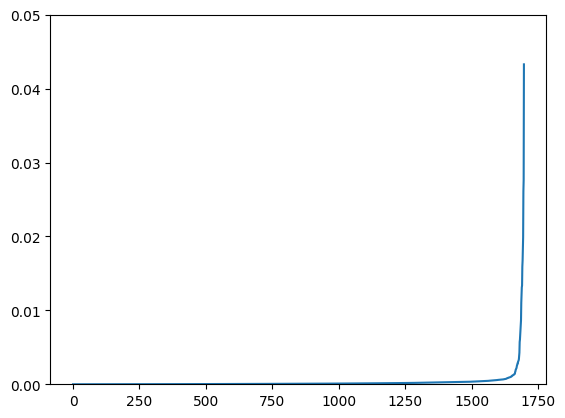

In [46]:
plt.plot(range(len(gloss_010_big)), list(gloss_010_big.values()))
#plt.bar(range(len(gloss_010_big)), list(gloss_010_big.values()), align='center')
plt.ylim(0, 0.05)
plt.show()

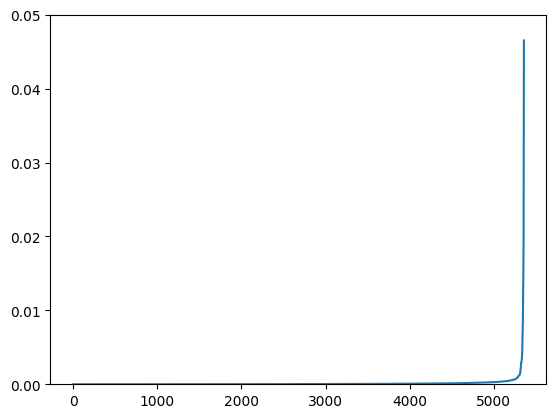

In [47]:
plt.plot(range(len(gloss_entire_big)), list(gloss_entire_big.values()))
#plt.bar(range(len(gloss_entire_big)), list(gloss_entire_big.values()), align='center')
plt.ylim(0, 0.05)
plt.show()

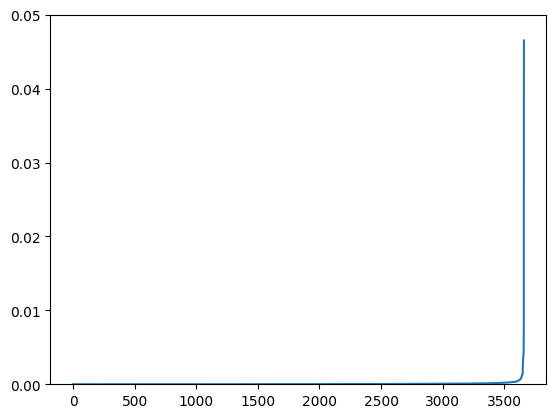

In [48]:
plt.plot(range(len(tokens_in_entire_only_big)), list(tokens_in_entire_only_big.values()))
#plt.bar(range(len(tokens_in_entire_only_big)), list(tokens_in_entire_only_big.values()), align='center')
plt.ylim(0, 0.05)
plt.show()

In [54]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-tc-big-en-fr")
for key in gloss_entire_big.keys():
    print(tokenizer.convert_ids_to_tokens(key) + "\t" + str(gloss_entire_big[key]))

▁prorogé	0.0
▁Veuillez	0.0
▁Neige	0.0
▁Montant	0.0
autorise	0.0
▁culminant	0.0
▁Phentermine	0.0
▁réalisateur	0.0
▁appuyez	0.0
▁jante	0.0
▁rectiligne	0.0
▁désactiver	0.0
▁Véhicule	0.0
▁commodités	6.697390274813345e-08
▁Éviter	6.697390274813345e-08
▁Engel	6.697390274813345e-08
▁Colonne	6.697390274813345e-08
▁Coordonnées	6.697390274813345e-08
▁divertir	6.697390274813345e-08
▁canada	6.697390274813345e-08
▁souscription	6.697390274813345e-08
▁History	6.697390274813345e-08
Hôte	6.697390274813345e-08
▁inaugure	6.697390274813345e-08
▁frapper	6.697390274813345e-08
accrocher	6.697390274813345e-08
▁Client	6.697390274813345e-08
▁détendre	6.697390274813345e-08
▁hurle	6.697390274813345e-08
▁peluche	6.697390274813345e-08
▁inconditionnel	6.697390274813345e-08
▁effréné	6.697390274813345e-08
apéritif	1.339478054962669e-07
▁primé	1.339478054962669e-07
▁bambou	1.339478054962669e-07
arrondi	1.339478054962669e-07
▁câble	1.339478054962669e-07
▁Descend	1.339478054962669e-07
▁Taxi	1.339478054962669e-07
▁plafond

In [55]:
for key in gloss_010_big.keys():
    print(tokenizer.convert_ids_to_tokens(key) + "\t" + str(gloss_010_big[key]))

▁câble	1.339478054962669e-07
▁emballage	1.339478054962669e-07
▁AAA	2.0092170824440035e-07
▁connecteur	2.678956109925338e-07
▁administrateur	3.348695137406673e-07
▁cartouche	4.018434164888007e-07
▁bail	6.027651247332011e-07
▁Rid	8.036868329776014e-07
▁NY	8.036868329776014e-07
▁jalousie	8.036868329776014e-07
▁extrémité	8.036868329776014e-07
enclave	9.376346384738683e-07
▁Intelligence	1.0046085412220019e-06
accouplement	1.0715824439701352e-06
▁Management	1.1385563467182687e-06
▁audition	1.2055302494664023e-06
▁attaque	1.2055302494664023e-06
▁dureté	1.2725041522145356e-06
▁antenne	1.339478054962669e-06
▁cauchemar	1.4064519577108026e-06
▁honteux	1.4064519577108026e-06
▁endroit	1.4064519577108026e-06
▁Résolution	1.4064519577108026e-06
▁bouchon	1.473425860458936e-06
▁congestion	1.473425860458936e-06
▁aire	1.473425860458936e-06
▁traçabilité	1.5403997632070695e-06
▁rhume	1.5403997632070695e-06
▁bosse	1.6073736659552028e-06
▁humeur	1.6743475687033363e-06
confirm	1.6743475687033363e-06
▁cétone	1.

In [50]:
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
for key in gloss_025_base.keys():
    print(tokenizer.convert_ids_to_tokens(key) + "\t" + str(gloss_025_base[key]))

▁câble	1.3311750548444122e-07
▁emballage	1.3311750548444122e-07
▁engageant	2.6623501096888243e-07
▁masturbation	2.6623501096888243e-07
▁administrateur	3.3279376371110305e-07
▁connecteur	3.3279376371110305e-07
▁cartouche	3.993525164533237e-07
▁Norme	3.993525164533237e-07
▁Ordinateur	3.993525164533237e-07
▁bail	5.990287746799855e-07
▁récompenses	7.321462801644268e-07
▁endommagé	7.321462801644268e-07
▁extrémité	7.987050329066474e-07
▁hall	7.987050329066474e-07
▁jalousie	7.987050329066474e-07
▁Rid	8.652637856488679e-07
▁timbre	9.318225383910886e-07
accouplement	1.0649400438755297e-06
▁Management	1.1314987966177504e-06
▁attaque	1.198057549359971e-06
▁confirm	1.198057549359971e-06
▁audition	1.198057549359971e-06
▁Proportion	1.198057549359971e-06
guet	1.198057549359971e-06
▁dureté	1.2646163021021915e-06
▁Intel	1.2646163021021915e-06
▁Ajustement	1.2646163021021915e-06
▁endroit	1.3977338075866329e-06
▁cauchemar	1.3977338075866329e-06
▁gélule	1.3977338075866329e-06
▁Résolution	1.3977338075866329

In [53]:
for key in gloss_010_base.keys():
    print(tokenizer.convert_ids_to_tokens(key) + "\t" + str(gloss_010_base[key]))

▁câble	1.3311750548444122e-07
▁emballage	1.3311750548444122e-07
▁connecteur	3.3279376371110305e-07
▁administrateur	3.3279376371110305e-07
▁cartouche	3.993525164533237e-07
▁bail	5.990287746799855e-07
▁jalousie	7.987050329066474e-07
▁extrémité	7.987050329066474e-07
▁hall	7.987050329066474e-07
▁Rid	8.652637856488679e-07
accouplement	1.0649400438755297e-06
▁Management	1.1314987966177504e-06
▁confirm	1.198057549359971e-06
▁Proportion	1.198057549359971e-06
▁audition	1.198057549359971e-06
▁attaque	1.198057549359971e-06
▁Intel	1.2646163021021915e-06
▁dureté	1.2646163021021915e-06
▁cauchemar	1.3977338075866329e-06
▁endroit	1.3977338075866329e-06
▁Résolution	1.3977338075866329e-06
▁gélule	1.3977338075866329e-06
▁bouchon	1.4642925603288536e-06
▁congestion	1.4642925603288536e-06
▁aire	1.4642925603288536e-06
▁traçabilité	1.530851313071074e-06
GUE	1.530851313071074e-06
▁bosse	1.5974100658132947e-06
▁humeur	1.6639688185555154e-06
▁tiges	1.6639688185555154e-06
▁Photos	1.7305275712977358e-06
▁compétiti